In [1]:
#Dựa trên các điểm thi đánh giá năng lực
#phán đoán xem sinh viên có định hướng nghề nghiệp
#chưa được định hướng nghề nghiệp
import pandas as pd
file_path = 'dulieuxettuyendaihoc.csv'
df = pd.read_csv(file_path,encoding='utf-8',header=0,delimiter=',')
# Hiển thị một số dòng đầu của DataFrame
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [2]:
#đổi tên
import numpy as np
import seaborn as sns
df.rename(columns={'TOANLOGICPHANTICH':'LOGIC','GIAIQUYETVANDE':'UNGXU','DINHHUONGNGHENGHIEP':'DINHHUONG'},inplace=True)
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,LOGIC,UNGXU,KT,NGAYTHI,DINHHUONG
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [3]:
df[['NGONNGU','LOGIC','UNGXU','DINHHUONG']].head(10)

,NGONNGU,LOGIC,UNGXU,DINHHUONG
0,3.25,3.25,4.50,No
1,6.00,4.00,3.50,Yes
2,5.00,6.75,4.00,No
3,4.25,4.25,5.25,No
4,4.25,4.50,5.00,No
5,1.50,4.00,6.00,No
6,6.50,6.75,5.25,Yes
7,3.75,4.50,4.25,Yes
8,3.50,3.50,6.75,Yes
9,4.00,4.75,5.50,Yes


In [4]:
#kĩ thuật one hot encoding
dinhhuong=pd.get_dummies(df['DINHHUONG'],drop_first=True)
df.drop('DINHHUONG',axis=1,inplace=True)
df=pd.concat([df,dinhhuong],axis=1)
df.head(5)

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,LOGIC,UNGXU,KT,NGAYTHI,Yes
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,False
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,True
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,False
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,False
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,False


In [5]:
X=df[['NGONNGU','LOGIC','UNGXU']].values #input: đặc trưng
y=df[['Yes']].values #output: mục tiêu

In [6]:
#input->model->output
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=16)

In [7]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train.flatten())


LogisticRegression()

In [10]:
classifier.coef_

array([[ 0.3198052 , -0.0430938 ,  0.02892471]])

In [11]:
classifier.intercept_

array([-1.2972971])

In [8]:
#Z=-1.29+0.319*NGONNGU-0.043*LOGIC+0.028*UNGXU
#=>f(z)=1/(1+e^-z) là hàm sigmoid
#đạo hàm f(z) nhỏ hơn 0.5 =>0, lớn hơn 0.05 =>1
X_test

array([[3.75, 4.5 , 4.25],
       [4.75, 2.  , 5.5 ],
       [3.5 , 4.75, 3.5 ],
       [5.75, 3.5 , 4.25],
       [4.75, 6.5 , 8.  ],
       [2.75, 3.75, 5.  ],
       [2.25, 3.5 , 5.  ],
       [3.75, 4.  , 3.5 ],
       [2.  , 5.25, 3.5 ],
       [4.  , 4.75, 5.5 ],
       [5.  , 4.  , 6.75],
       [2.5 , 3.5 , 6.5 ],
       [5.25, 4.5 , 4.75],
       [4.25, 2.75, 3.25],
       [5.  , 3.5 , 5.5 ],
       [1.5 , 4.5 , 5.5 ],
       [4.75, 4.75, 4.5 ],
       [6.5 , 4.5 , 8.  ],
       [2.25, 4.  , 4.25],
       [2.5 , 2.75, 5.5 ]])

In [9]:
#ngưỡng python là 0.5
y_pred_test=classifier.predict(X_test)
y_pred_test

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False, False])

In [10]:
print(classifier.predict_proba(X_test))
#cột trái là z cột phải là sigmoid

[[0.54215461 0.45784539]
 [0.42685951 0.57314049]
 [0.56989872 0.43010128]
 [0.37433018 0.62566982]
 [0.45684127 0.54315873]
 [0.6070219  0.3929781 ]
 [0.64197353 0.35802647]
 [0.54219101 0.45780899]
 [0.68626015 0.31373985]
 [0.5159161  0.4840839 ]
 [0.4195562  0.5804438 ]
 [0.61315692 0.38684308]
 [0.41942105 0.58057895]
 [0.490658   0.509342  ]
 [0.42311803 0.57688197]
 [0.7010757  0.2989243 ]
 [0.46325555 0.53674445]
 [0.3059946  0.6940054 ]
 [0.65184989 0.34815011]
 [0.61235118 0.38764882]]


In [11]:
#Changing threshold and predicting
#chọn ngưỡng là 0.65
print('prediction with threshold 0.65 :')
y_pred_test_new_threshold=(classifier.predict_proba(X_test)[:,1]>=0.65).astype(int)
y_pred_test_new_threshold

prediction with threshold 0.65 :


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [12]:
#default threshold=0.5
result=pd.DataFrame({'Actual': y_test.flatten(),'Predicted': y_pred_test})
result

,Actual,Predicted
0,True,False
1,False,True
2,True,False
3,True,True
4,False,True
5,False,False
6,False,False
7,True,False
8,False,False
9,True,False


In [13]:
from sklearn.metrics import accuracy_score
print("Dự báo:")
accuracy_score(y_test,y_pred_test)

Dự báo:


0.35

In [14]:
#tp=(ac=1,pre=1)
#fp(ac=0,pre=1)
#pn(ac=1,pre=0)
#tn(ac=0,pre=0)
#tp tn dự báo đúng
#tổng là số lương mẫu dữ liệu
#ma trận confusion mỗi ô hiển thị tp fp fn tn
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred_test)
cf_matrix

array([[5, 7],
       [6, 2]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

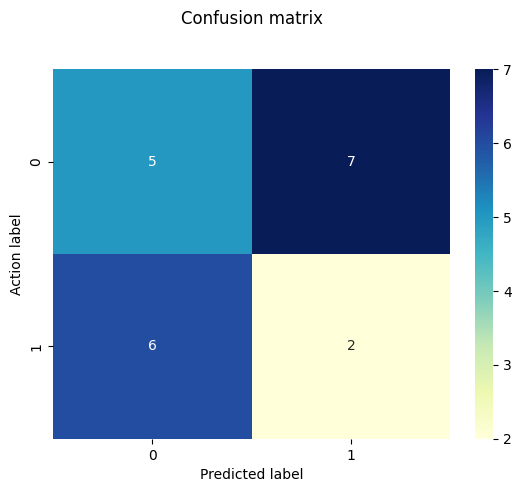

In [15]:
import matplotlib.pyplot as plt
sns.heatmap(pd.DataFrame(cf_matrix),annot=True,cmap='YlGnBu',fmt='g')
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Action label')
plt.xlabel('Predicted label')

In [20]:
#Các độ đo đánh giá mô hình phân lớp
#N là số lượng mẫu =TP+FP+FN+TN
#TP,FP,FN,FN
#accurary=(TP+TN)/(TP+FP+FN+TN)
#precision=TP/(TP+FP)
#recall=TP/(TP+FN)
#F1-Score=2*precision*Recall/(Precision+Recall)

from sklearn.metrics import classification_report
target_names=['Not oriented','Oriented']
print(classification_report(y_test,y_pred_test,target_names=target_names))

              precision    recall  f1-score   support

Not oriented       0.45      0.42      0.43        12
    Oriented       0.22      0.25      0.24         8

    accuracy                           0.35        20
   macro avg       0.34      0.33      0.34        20
weighted avg       0.36      0.35      0.35        20



In [21]:
#lưu trữ vô mình xuống thiết bị
import pickle
pickle.dump(classifier, open('model_logistic_regression.sav','wb'))

In [22]:
#load storage
import pickle
loaded_model=pickle.load(open('model_logistic_regression.sav','rb'))
vNN=float(input('Điểm ngôn ngữ: '))
vLG=float(input('Điểm logic: '))
vUX=float(input('Điểm ứng xử: '))
y_pred=loaded_model.predict([[vNN,vLG,vUX]])
print('Dự báo định hướng: '+str(y_pred[0]))

Dự báo định hướng: True
